In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("SalesStore.csv")
df.head()

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH


In [4]:
df['Sales'].dtypes

dtype('int64')

In [5]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,Postal_Code,Sales,Quantity,Profit
0,44104,5,1,0.15
1,44104,5,1,0.15
2,44104,5,1,0.15
3,44104,5,1,0.15
4,44104,5,1,0.15


Categorical Variables



,Order_Date,Ship_Date,Ship_Mode,Region,Product_Reference,Category,Sub_Category,State
0,2021-02-15,2021-02-20,Ground,Midwest,OFF-TAP-10022901,Office Supplies,Tape,OH
1,2021-02-15,2021-02-20,Ground,Midwest,OFF-TAP-10023012,Office Supplies,Tape,OH
2,2021-02-15,2021-02-20,Ground,Midwest,OFF-TAP-10002828,Office Supplies,Tape,OH
3,2021-02-15,2021-02-20,Ground,Midwest,OFF-TAP-10022901,Office Supplies,Tape,OH
4,2021-02-15,2021-02-20,Ground,Midwest,OFF-TAP-10000482,Office Supplies,Tape,OH


In [6]:
df.isnull().sum()

Order_Date           0
Ship_Date            0
Ship_Mode            0
Postal_Code          0
Region               0
Product_Reference    0
Category             0
Sub_Category         0
Sales                0
Quantity             0
Profit               0
State                0
dtype: int64

Text(0.5, 1.0, 'Profit by Region')

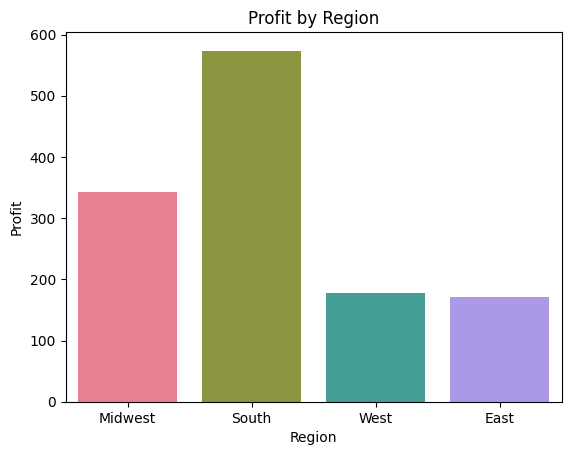

In [7]:
sns.barplot(data=df, x='Region', y='Profit', estimator = 'sum', ci = 0, palette='husl')
plt.title('Profit by Region')

Text(0.5, 1.0, 'Product_Reference with the Highest Profit')

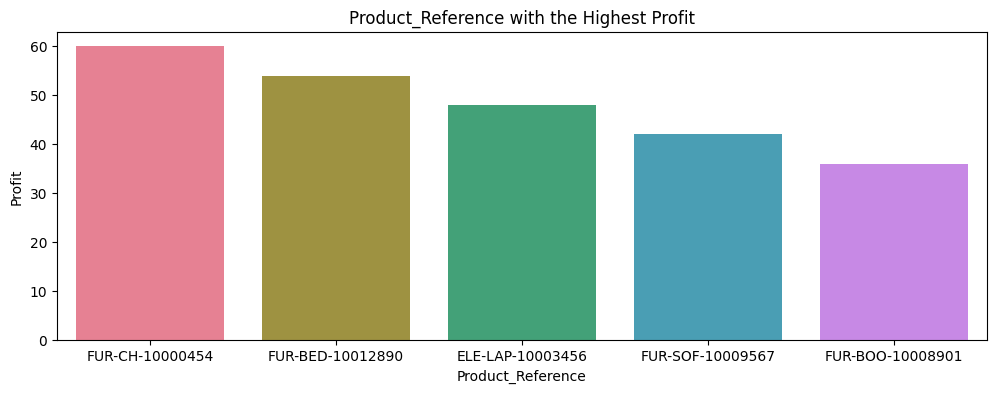

In [17]:
sal = df.groupby('Product_Reference')[['Profit']].sum().sort_values(by = 'Profit', ascending = False).head(5)
plt.figure(figsize = (12, 4))
sns.barplot(data=sal, x=sal.index, y='Profit', estimator = 'sum', ci = 0, palette='husl')
plt.title('Product_Reference with the Highest Profit')



In [127]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
import pickle, joblib

order_data_encode = LabelEncoder()
df['Order_Date'] = order_data_encode.fit_transform(df[['Order_Date']])
# joblib.dump(order_data_encode, 'order_data_encode.pkl')

product_reference_encode = LabelEncoder()
df['Product_Reference'] = product_reference_encode.fit_transform(df[['Product_Reference']])
# joblib.dump(product_reference_encode, 'product_reference_encode.pkl')

sub_category_encode = LabelEncoder()
df['Sub_Category'] = sub_category_encode.fit_transform(df[['Sub_Category']])
# joblib.dump(sub_category_encode, 'sub_category_encode.pkl')
df.head()

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,0,0,1,44104,1,159,2,31,5,1,0.15,5
1,0,0,1,44104,1,160,2,31,5,1,0.15,5
2,0,0,1,44104,1,158,2,31,5,1,0.15,5
3,0,0,1,44104,1,159,2,31,5,1,0.15,5
4,0,0,1,44104,1,157,2,31,5,1,0.15,5


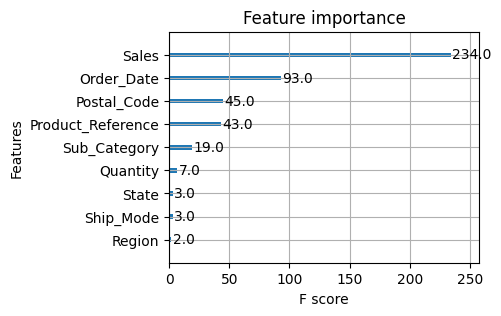

In [96]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBRegressor()

x = df.drop('Profit', axis = 1)
y = df.Profit

model.fit(x, y)

plt.rcParams['figure.figsize'] = (4, 3)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [98]:
sel_cols = ['Sales','Order_Date','Postal_Code','Product_Reference','Sub_Category','Quantity','Profit']
sel_df = df[sel_cols]
sel_df.head()

,Sales,Order_Date,Postal_Code,Product_Reference,Sub_Category,Quantity,Profit
0,5,0,44104,159,31,1,0.15
1,5,0,44104,160,31,1,0.15
2,5,0,44104,158,31,1,0.15
3,5,0,44104,159,31,1,0.15
4,5,0,44104,157,31,1,0.15


<Axes: >

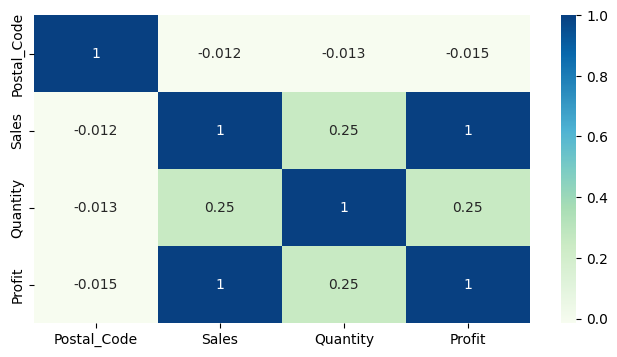

In [126]:
plt.figure(figsize = (8,4))
sns.heatmap(num.corr(), annot =True,cmap = 'GnBu')

In [99]:
from sklearn.model_selection import train_test_split

x = sel_df.drop('Profit', axis = 1)
y = sel_df.Profit

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 7)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (172, 6)
xtest: (44, 6)
ytrain: (172,)
ytest: (44,)


In [100]:
# MODELLING ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)
lin_reg



LinearRegression()

In [101]:
cross_val = lin_reg.predict(xtrain)
# metric
print(f'Linear Regressor Mean Error: {mean_absolute_error(cross_val, ytrain).round(2)}')
print(f'Linear Regressor Model Performance: {r2_score(cross_val, ytrain).round(2)}')

Linear Regressor Mean Error: 0.04
Linear Regressor Model Performance: 1.0


In [114]:
# joblib.dump(lin_reg, 'sales_store_model.pkl')

['sales_store_model.pkl']